In [1]:
import pandas as pd
import pathlib
from os.path import abspath, splitext
from skimage.io import imread, imsave
from PIL import Image
from os import walk
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
images_folder = 'images'
masks_folder = 'masks'
annotation_file = 'annotations.csv'
train_path = '/home/lbbduy/Documents/Master_Final/datasets/kiengiang_dataset/train/'
validation_path = '/home/lbbduy/Documents/Master_Final/datasets/kiengiang_dataset/validation/'
test_set_1_path = '/home/lbbduy/Documents/Master_Final/datasets/kiengiang_dataset/test_set_1/'
test_set_2_path = '/home/lbbduy/Documents/Master_Final/datasets/kiengiang_dataset/test_set_2/'
test_set_3_path = '/home/lbbduy/Documents/Master_Final/datasets/kiengiang_dataset/test_set_3/'

In [3]:

train_file_names = next(walk(train_path + images_folder), (None, None, []))[2]  # [] if no file
validation_file_names = next(walk(validation_path + images_folder), (None, None, []))[2]  # [] if no file
test_set_1_file_names = next(walk(test_set_1_path + images_folder), (None, None, []))[2]  # [] if no file
test_set_2_file_names = next(walk(test_set_2_path + images_folder), (None, None, []))[2]  # [] if no file
test_set_3_file_names = next(walk(test_set_3_path + images_folder), (None, None, []))[2]  # [] if no file

In [42]:
def generate_masks(list_file_names=None, section_path =''):
    df = pd.read_csv(section_path + annotation_file, index_col='file_path')
    for _, file_name in tqdm(enumerate(list_file_names), total=len(list_file_names)):
        image_path = section_path + images_folder + '/' + file_name

        save_mask_file = splitext(section_path + masks_folder + '/' + file_name)[0] + '.png'
        img = imread(image_path, as_gray=True)
        h, w = img.shape

        mask_array = np.zeros((h, w), dtype='uint8')
        mask = Image.fromarray(mask_array)

        dot_annotations = df.filter(like=file_name, axis=0)
        for index, annotation in dot_annotations.iterrows():
            x = (annotation['x1'] + annotation['x2']) // 2
            y = (annotation['y1'] + annotation['y2']) // 2
            mask_array[y][x] = 255

        mask.save(save_mask_file)

In [43]:
generate_masks(list_file_names=train_file_names, section_path=train_path)

100%|██████████| 1260/1260 [00:18<00:00, 67.29it/s]


In [45]:
generate_masks(list_file_names=validation_file_names, section_path=validation_path)

100%|██████████| 360/360 [00:04<00:00, 74.83it/s]


In [46]:
generate_masks(list_file_names=test_set_1_file_names, section_path=test_set_1_path)
generate_masks(list_file_names=test_set_2_file_names, section_path=test_set_2_path)
generate_masks(list_file_names=test_set_3_file_names, section_path=test_set_3_path)

100%|██████████| 100/100 [00:02<00:00, 34.21it/s]


In [7]:
train_data = pd.read_csv(test_set_2_path + annotation_file, index_col='file_path')
rows = train_data.filter(like='video9_00060.jpg', axis=0)
x_list = []
y_list = []
for index, row in rows.iterrows():
    x_list.append((row['x1'] +  row['x2']) // 2)
    y_list.append((row['y1'] +  row['y2']) // 2)
    print(row)

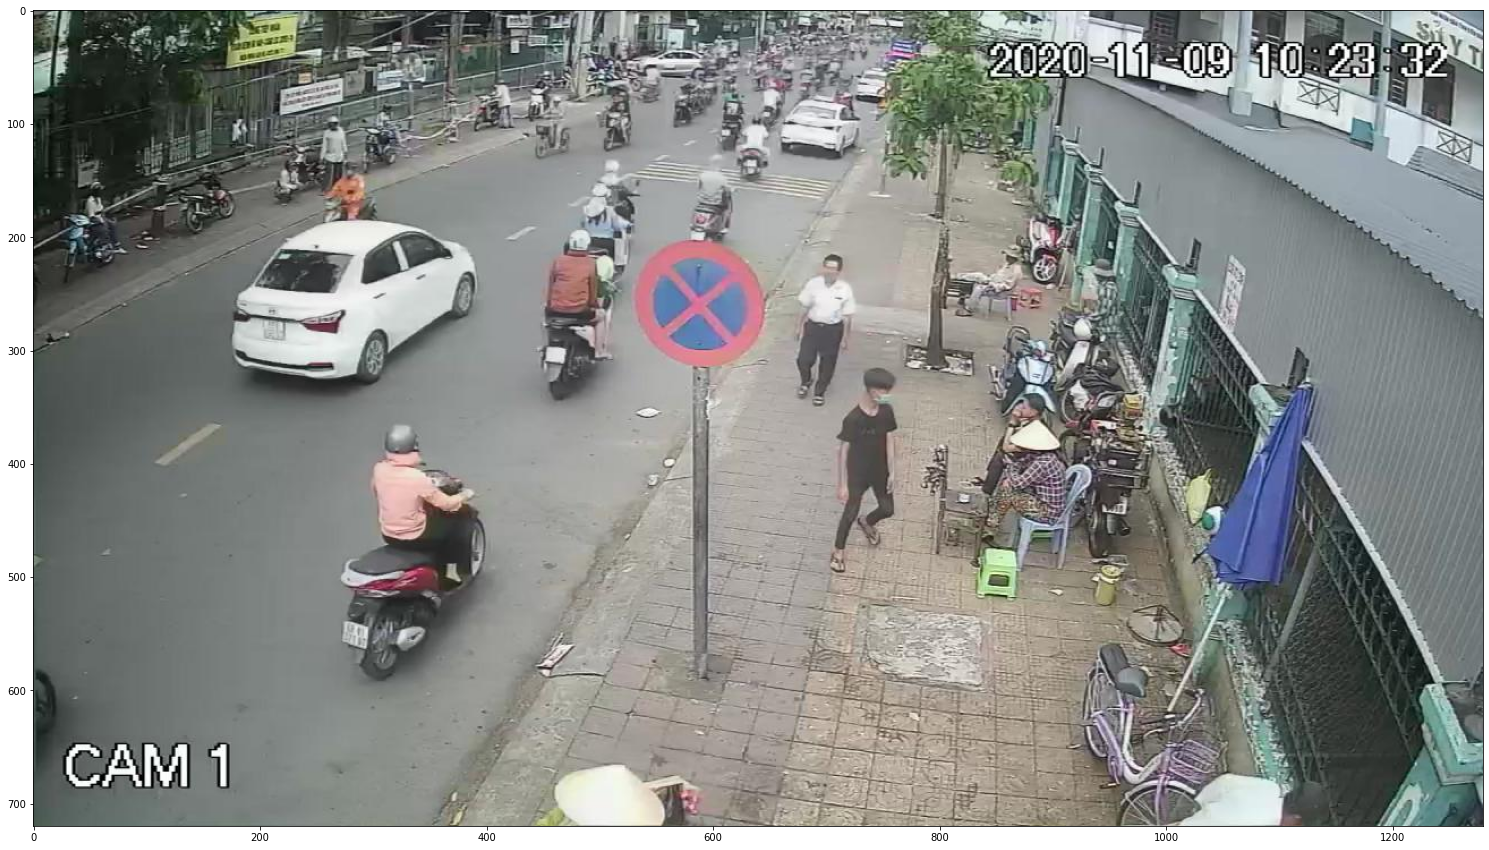

In [5]:
img = imread('/home/lbbduy/Documents/Master_Final/datasets/kiengiang_dataset/test/images/video9_00060.jpg')

# x_list = [528, 112,615,110]
# y_list = [637, 165,437,216]

plt.figure(figsize=(30, 15))
plt.scatter(x=x_list, y=y_list, marker='x', color="red", s=60)
plt.imshow(img)
plt.show()